# Predicting Concrete Compressive Strength 👷🏗️

## Initial Data Preparation

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import 

In [14]:
# Reading in the data
data = pd.read_csv("Concrete_Data.csv")

In [15]:
data.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   ash               1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseagg         1030 non-null   float64
 6   fineagg           1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [17]:
data.isna().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

Columns are all in the right datatype. No conversion necessary. Also no missing values.

## Data Exploration

We have the following features:

- Cement ($kg$ in a $m^3$ mixture)
- Blast Furnace Slag ($kg$ in a $m^3$ mixture)
- Fly Ash ($kg$ in a $m^3$ mixture)
- Water ($kg$ in a $m^3$ mixture)
- Superplasticizer ($kg$ in a $m^3$ mixture)
- Coarse Aggregate ($kg$ in a $m^3$ mixture)
- Fine Aggregate ($kg$ in a $m^3$ mixture)
- Age (days)
- Concrete compressive strength (MPa, megapascals)



In [23]:
data.head(10)

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


### Distributions of the predictors

In [85]:
data.melt()

,variable,value
0,cement,540.000000
1,cement,540.000000
2,cement,332.500000
3,cement,332.500000
4,cement,198.600000
...,...,...
9265,strength,44.284354
9266,strength,31.178794
9267,strength,23.696601
9268,strength,32.768036


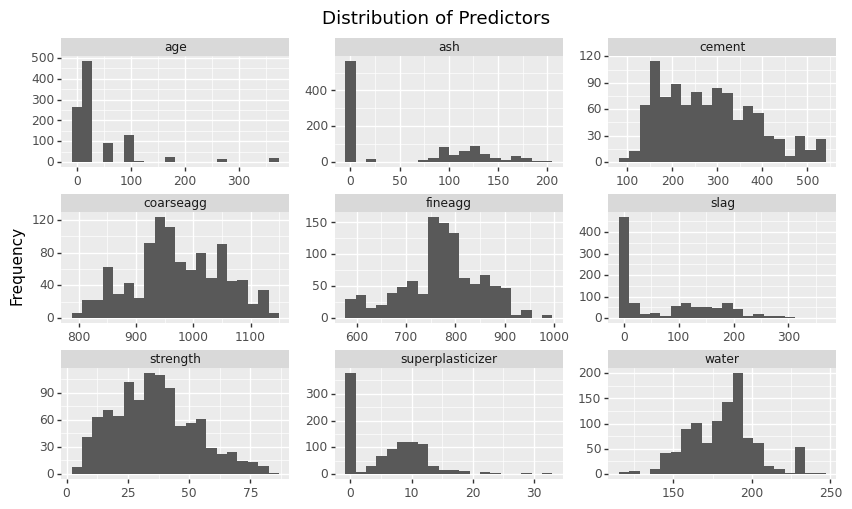

<ggplot: (150637239879)>

In [99]:
(
    ggplot(data=data.melt(), mapping=aes(x="value")) +
    geom_histogram(bins=20) +
    facet_wrap("~ variable", scales="free") +
    labs(title="Distribution of Predictors", x=None, y="Frequency") +
    theme(subplots_adjust={'hspace': 0.4, "wspace":0.2},
          figure_size=[10,5.5])
)

### Relation with the target variable

In [ ]:
data.melt(id_vars="strength")

,strength,variable,value
0,79.986111,cement,540.0
1,61.887366,cement,540.0
2,40.269535,cement,332.5
3,41.052780,cement,332.5
4,44.296075,cement,198.6
...,...,...,...
8235,44.284354,age,28.0
8236,31.178794,age,28.0
8237,23.696601,age,28.0
8238,32.768036,age,28.0


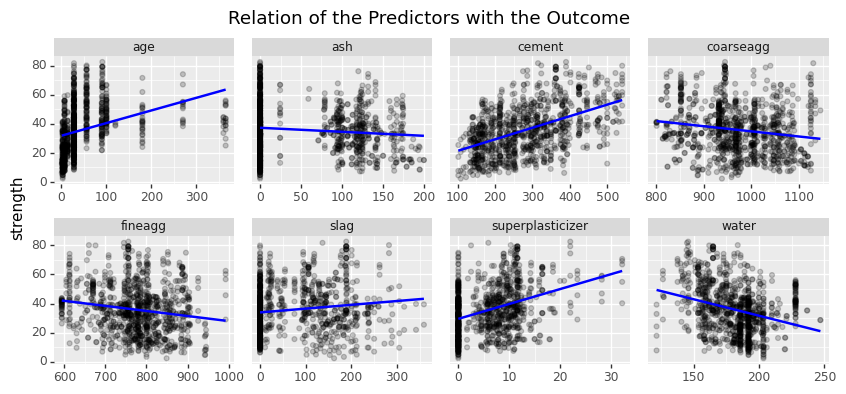

<ggplot: (150649016561)>

In [100]:
(
    ggplot(data=data.melt(id_vars="strength"), mapping=aes(x="value", y="strength")) +
    geom_point(alpha=0.2) +
    facet_wrap("~ variable", scales="free_x", nrow=2) +
    geom_smooth(method="lm", color="blue", se=False) +
    labs(title="Relation of the Predictors with the Outcome", x=None) +
    theme(subplots_adjust={'hspace': 0.4, "wspace":0.1},
          figure_size=[10,4])
)


### Building two models

In [283]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn import config_context

config_context(transform_output="pandas")

In [103]:
X, y = data.drop("strength", axis=1), data["strength"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [124]:
# only numerical columns in this data set
num_cols = X_train.select_dtypes(include=[np.number]).columns

Index([], dtype='object')

Now the important part: Preprocessing. Easy here because: No missing data, no categorical features, we just have to normalise the columns for the elastic net.

In [286]:
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("numeric", numerical_transformer, num_cols)
])

en_pipeline = Pipeline(steps=[
    ("processing", preprocessor),
    ("ENmodel", ElasticNet())
])

rf_pipeline = Pipeline(steps=[
    ("processing", preprocessor),
    ("RFmodel", RandomForestRegressor(n_jobs=6))
])

lin_pipeline = Pipeline(steps=[
    ("processing", preprocessor),
    ("RFmodel", LinearRegression())
])

See transformed dataset:

In [149]:
pd.DataFrame(preprocessor.fit_transform(X_train, y_train),
             columns=preprocessor.get_feature_names_out())

,numeric__cement,numeric__slag,numeric__ash,numeric__water,numeric__superplasticizer,numeric__coarseagg,numeric__fineagg,numeric__age
0,2.405818,-0.877871,-0.851402,-1.824288,3.657651,-1.541613,1.474109,-0.688949
1,-0.428203,-0.877871,0.609676,0.787465,-0.302248,-0.313952,0.959165,0.844133
2,-0.608348,-0.269516,1.031562,-1.180314,0.542747,0.555782,0.071835,0.148714
3,1.058780,1.259287,-0.851402,-1.633378,2.618791,-0.344210,-0.235347,0.701888
4,0.252843,1.423249,-0.851402,1.048687,-1.067486,-0.076540,-1.782411,0.686083
...,...,...,...,...,...,...,...,...
767,-0.260918,-0.877871,0.975640,0.347904,-0.104027,0.738108,-0.211422,0.148714
768,1.012100,-0.877871,-0.851402,0.233824,-1.067486,-0.068782,-0.146093,-0.720559
769,-1.283772,-0.877871,1.852009,-1.069958,1.948559,-0.366193,0.858011,-0.293825
770,-0.373045,3.186121,-0.851402,0.219854,-1.067486,-0.384296,-1.369613,-0.293825


Next spicy thing: Hyperparameter Tuning

In [327]:
# Mixture
l1_ratio = [round(x, ndigits=5) for x in np.linspace(start=0, stop=1, num=50)]

# Penalty
alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1] + [round(x, ndigits=5) for x in np.linspace(start=1, stop=100, num=10)]

# Create grid dictionary
# Important: Put the Name of the model from the pipeline including two backspaces
# before the parameter names in the dictionary
en_grid = {'ENmodel__l1_ratio':l1_ratio,
        'ENmodel__alpha':alpha}

In [328]:
combinations = 1
for key in list(en_grid):
    combinations *= len(en_grid[key])
print(f"Grid will lead to {combinations} combinations")

Grid will lead to 800 combinations


In [202]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=1500, num=4)]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(
    start=1, stop=data.shape[1]-1, num=4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=3)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create grid dictionary
# Important: Put the Name of the model from the pipeline including two backspaces
# before the parameter names in the dictionary
rf_grid = {'RFmodel__n_estimators': n_estimators,
           'RFmodel__max_features': max_features,
           'RFmodel__max_depth': max_depth,
           'RFmodel__min_samples_leaf': min_samples_leaf}

rf_grid


{'RFmodel__n_estimators': [200, 633, 1066, 1500],
 'RFmodel__max_features': [1, 3, 5, 8],
 'RFmodel__max_depth': [10, 60, 110],
 'RFmodel__min_samples_leaf': [1, 2, 4]}

In [323]:
combinations = 1
for key in list(rf_grid):
    combinations *= len(rf_grid[key])
print(f"Grid will lead to {combinations} combinations")

Grid will lead to 144 combinations


Run the ting:

In [329]:
%%capture --no-display

en_search = (
    GridSearchCV(en_pipeline, param_grid=en_grid, cv=3, verbose=0, scoring="r2")
    .fit(X_train, y_train)
)

In [201]:
rf_search = (
    GridSearchCV(rf_pipeline, param_grid=rf_grid, cv=3, verbose=1, scoring="r2")
    .fit(X_train, y_train)
)

Fitting 2 folds for each of 528 candidates, totalling 1056 fits


In [287]:
# No hyperparams for linear regression, 
lin_fit = lin_pipeline.fit(X_train, y_train)

In [331]:
# Select the hyperparams and the score from the results
en_results = pd.DataFrame(en_search.cv_results_).filter(["param_" + x for x in list(en_grid.keys())] + ["mean_test_score"])

# Clean up column headers
en_results.columns = en_results.columns.str.replace("param_ENmodel__", "")

en_results.sort_values("mean_test_score", ascending=False)

,l1_ratio,alpha,mean_test_score
150,0.0,0.001,0.597637
151,0.02041,0.001,0.597637
152,0.04082,0.001,0.597636
153,0.06122,0.001,0.597635
154,0.08163,0.001,0.597634
...,...,...,...
543,0.87755,45.0,-0.001576
542,0.85714,45.0,-0.001576
541,0.83673,45.0,-0.001576
540,0.81633,45.0,-0.001576


In [216]:
# Select the hyperparams and the score from the results
rf_results = pd.DataFrame(rf_search.cv_results_).filter(["param_" + x for x in list(rf_grid.keys())] + ["mean_test_score"])

# Clean up column headers
rf_results.columns = rf_results.columns.str.replace("param_RFmodel__", "")

rf_results.sort_values("mean_test_score", ascending=False)

,n_estimators,max_features,max_depth,min_samples_leaf,mean_test_score
411,1500,5,90,1,0.868632
75,1500,5,20,1,0.868195
409,633,5,90,1,0.868017
507,1500,5,110,1,0.867979
265,633,5,60,1,0.867965
...,...,...,...,...,...
106,1066,1,30,4,0.682637
440,200,1,100,4,0.682376
488,200,1,110,4,0.682006
344,200,1,80,4,0.679497


Make predictions on the holdout and evaluate the models:

In [222]:
# Print the metrics
print(f"R-Squared: {r2_score(y_pred=en_search.predict(X_test), y_true=y_test)}")
print(f"MAE: {mean_absolute_error(y_pred=en_search.predict(X_test), y_true=y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred=en_search.predict(X_test), y_true=y_test)}")

R-Squared: 0.6238083013913458
MAE: 7.777109827010932
MAPE: 0.32769397812129325


In [223]:
# Print the metrics
print(f"R-Squared: {r2_score(y_pred=rf_search.predict(X_test), y_true=y_test)}")
print(f"MAE: {mean_absolute_error(y_pred=rf_search.predict(X_test), y_true=y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred=rf_search.predict(X_test), y_true=y_test)}")

R-Squared: 0.9069301829177165
MAE: 3.3812009222177846
MAPE: 0.1288192389563847


In [289]:
# Print the metrics
print(f"R-Squared: {r2_score(y_pred=lin_fit.predict(X_test), y_true=y_test)}")
print(f"MAE: {mean_absolute_error(y_pred=lin_fit.predict(X_test), y_true=y_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_pred=lin_fit.predict(X_test), y_true=y_test)}")

R-Squared: 0.6234144623557858
MAE: 7.78140030502093
MAPE: 0.3275052198623919


Plotting the predictions:

In [292]:
rf_preds = pd.DataFrame({"predictions": rf_search.predict(X_test),
                         "truth": y_test})

en_preds = pd.DataFrame({"predictions": en_search.predict(X_test),
                         "truth": y_test})

lin_preds = pd.DataFrame({"predictions": lin_fit.predict(X_test),
                         "truth": y_test})

predictions = pd.concat([
    rf_preds.assign(model="Random Forest"),
    en_preds.assign(model="Elastic Net"),
    lin_preds.assign(model="Linear Regression")
])

predictions

,predictions,truth,model
747,30.851490,26.062193,Random Forest
718,7.817500,10.354551,Random Forest
175,79.203422,79.296635,Random Forest
828,60.264034,74.987410,Random Forest
713,11.588778,9.694722,Random Forest
...,...,...,...
453,31.053542,31.715896,Linear Regression
906,38.742464,39.417343,Linear Regression
757,21.559515,18.126324,Linear Regression
875,24.536955,18.284904,Linear Regression


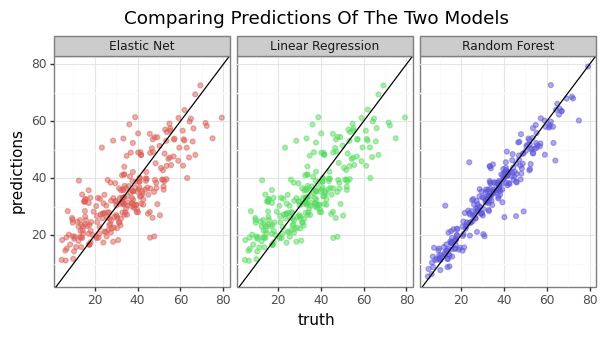

<ggplot: (150682421200)>

In [295]:
(
    ggplot(data=predictions, mapping=aes(x="truth", y="predictions")) +
    geom_point(aes(color="model"), alpha=0.5) +
    geom_abline() +
    facet_wrap("~ model") +
    labs(title="Comparing Predictions Of The Two Models") +
    theme_bw() +
    theme(figure_size=[7, 3],
          legend_position="none")
)


In [ ]:
en_preds = pd.DataFrame({"predictions": rf_search.predict(X_test),
                         "truth": y_test})

(
    ggplot(data=rf_preds, mapping=aes(x="truth", y="predictions")) +
    geom_point(alpha=0.3) +
    geom_abline() +
    labs(title="Random Forest") +
    theme(figure_size=[6,3])
)